In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes

load_diabetes().keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
data,target = load_diabetes(return_X_y=True)
print(data.shape, target.shape)

(442, 10) (442,)


In [4]:
print(type(data),type(target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
diabetes_data = pd.DataFrame(data=data, columns=load_diabetes().feature_names)
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<AxesSubplot:>

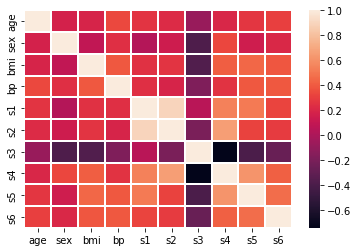

In [7]:
sns.heatmap(diabetes_data.corr(), linewidth=2, linecolor='white')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape)

(353, 10) (89, 10)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [11]:
predict = lin_reg.predict(X_test)

In [12]:
predict[:5]

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872])

In [13]:
y_test[:5]

array([219.,  70., 202., 230., 111.])

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_metrics(original=y_test, predicted=predict):
    mse = mean_squared_error(original, predicted)
    mae = mean_absolute_error(original, predicted)
    rmse = np.sqrt(abs(mse))
    return (f'mse:{mse} mae:{mae} rmse:{rmse}')

In [15]:
print(evaluate_metrics(y_test, predict))

mse:2900.193628493482 mae:42.79409467959994 rmse:53.85344583676593


In [16]:
sv_reg = SVR(C=17,kernel='rbf')
sv_reg.fit(X_train,y_train)
predict = sv_reg.predict(X_test)
print(evaluate_metrics(y_test, predict))

mse:2568.880893329639 mae:39.704860466734495 rmse:50.68412861369562


In [17]:
tree = DecisionTreeRegressor(max_depth=2,min_samples_leaf=1,min_samples_split=3)
tree.fit(X_train, y_train)
predict = tree.predict(X_test)
print(evaluate_metrics(y_test, predict))

mse:3735.4996177389003 mae:49.36534526165699 rmse:61.1187337707425


In [18]:
forest = RandomForestRegressor(max_depth= 4, max_features=4, max_leaf_nodes= 3, min_samples_leaf= 2,
            min_samples_split= 2, min_weight_fraction_leaf= 0, n_estimators= 100)

forest.fit(X_train, y_train)
predict = forest.predict(X_test)
print(evaluate_metrics(y_test,predict))

mse:3141.887479577188 mae:47.50094008881015 rmse:56.0525421330486
